## predicting penguins species 
## environment setup

In [1]:
import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


## loading the dataset 

In [2]:
penguins = pd.read_csv("penguins_size.csv")        

## preview of dataset

In [3]:
penguins      

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Filling out empty enteries with fillna()

In [6]:
penguin=penguins
penguin.fillna(method='ffill', inplace=True)

In [7]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
penguin

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## Description of class

In [9]:
print(penguins.groupby('species').size())

species
Adelie       152
Chinstrap     68
Gentoo       124
dtype: int64


## Dataset visualization

<AxesSubplot:>

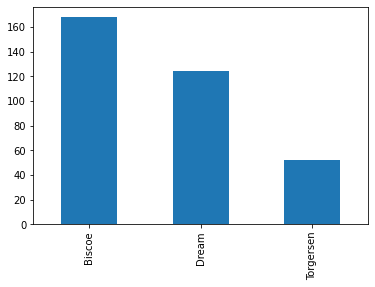

In [10]:
penguin.island.value_counts().plot(kind='bar')  # no. of species in each island

In [11]:
penguin.sex.value_counts()     # Gender count

MALE      176
FEMALE    167
.           1
Name: sex, dtype: int64

## Relation of species with different features in the dataset

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

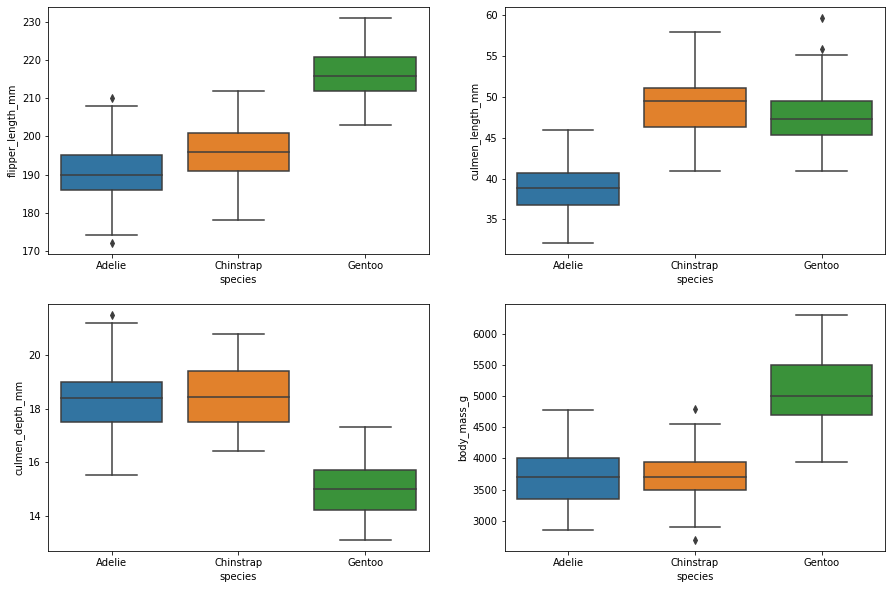

In [12]:
#BOX plot
plt.figure(figsize=(15,10))    
plt.subplot(2,2,1)    
sns.boxplot(x='species',y='flipper_length_mm',data=penguin)    
plt.subplot(2,2,2)    
sns.boxplot(x='species',y='culmen_length_mm',data=penguin)    
plt.subplot(2,2,3)    
sns.boxplot(x='species',y='culmen_depth_mm',data=penguin)    
plt.subplot(2,2,4)    
sns.boxplot(x='species',y='body_mass_g',data=penguin)  


## Pair plot

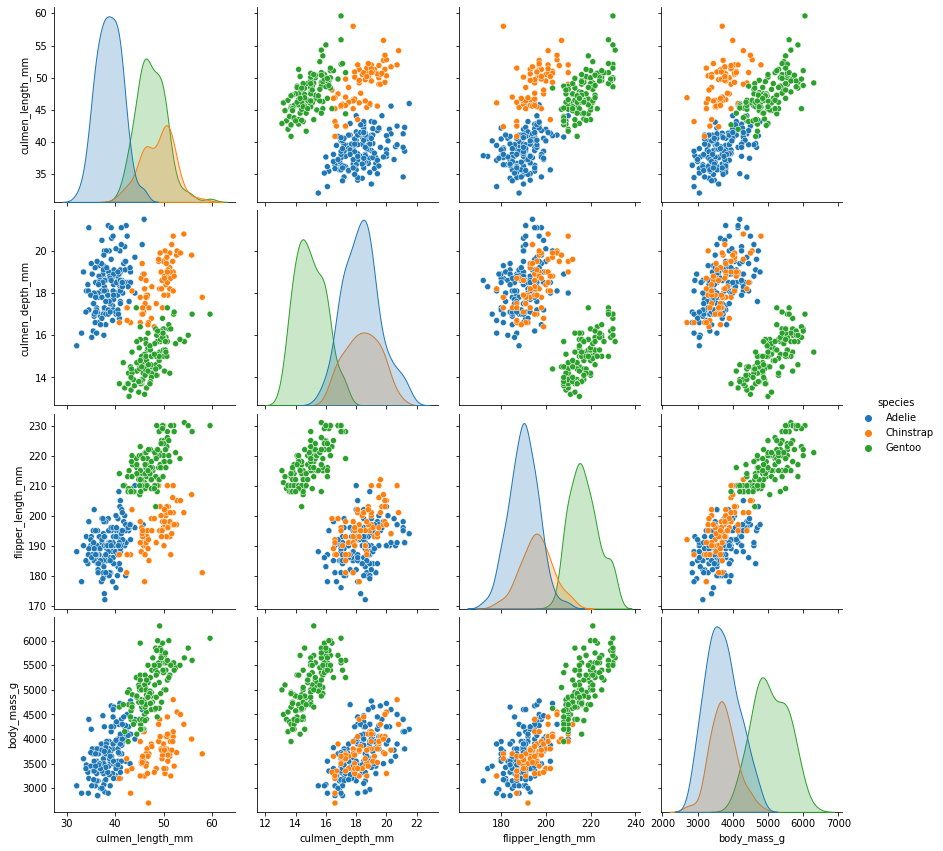

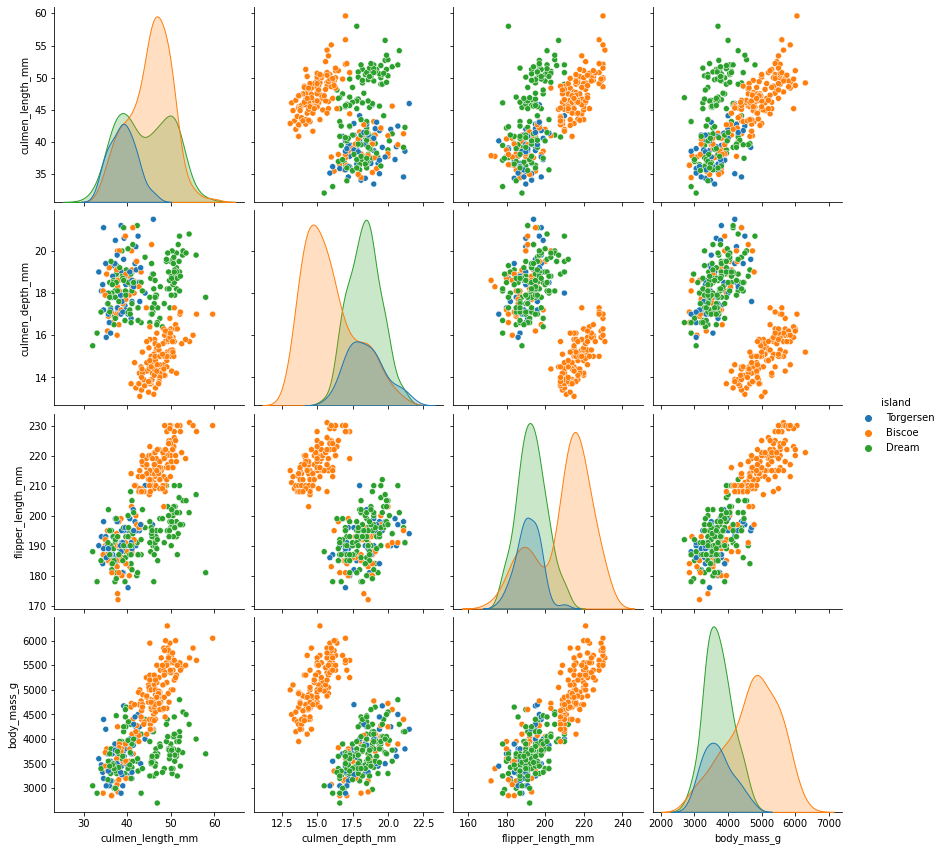

In [13]:
# The pair plot used to figure out a distribution of single variables and the relationship between two variables 
# here it is also sperate with different species for clear picture
sns.pairplot(penguin, hue='species', height=3, diag_kind="kde")    
sns.pairplot(penguin,hue='island',  height=3) 

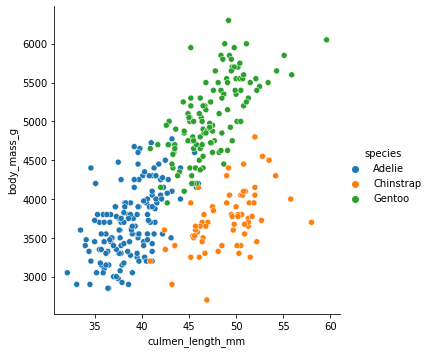

In [14]:
#looking at body mass relation with culmen_length closely
sns.relplot(data=penguin, x='culmen_length_mm', y='body_mass_g', hue="species")

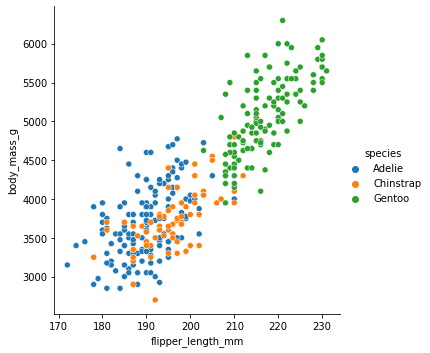

In [15]:
#looking at body mass relation with flipper_length closely
sns.relplot(data=penguin, x='flipper_length_mm', y='body_mass_g', hue="species")

## looking for correlations

In [16]:
corr_matrix=penguin.corr()

In [17]:
corr_matrix['culmen_length_mm'].sort_values(ascending=False)

culmen_length_mm     1.000000
flipper_length_mm    0.656864
body_mass_g          0.596365
culmen_depth_mm     -0.237563
Name: culmen_length_mm, dtype: float64

## Mean of features with different species, island and sex

In [18]:
penguin.groupby('species').mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.801316,18.344079,189.986842,3697.697368
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.502419,14.971774,217.161290,5074.798387


In [19]:
penguin.groupby('island').mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
island,,,,
Biscoe,45.269048,15.861905,209.732143,4717.261905
Dream,44.167742,18.344355,193.072581,3712.903226
Torgersen,38.976923,18.421154,191.269231,3697.596154


In [20]:
penguin.groupby('sex').mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
.,44.500000,15.700000,217.000000,4875.000000
FEMALE,42.116766,16.418563,197.449102,3864.970060
MALE,45.629545,17.839773,204.153409,4516.193182


## Train and validate dataset

In [21]:
from sklearn.preprocessing import LabelEncoder        # separating dataset in 3 parts X0, Z are features Y is prediction labels
X0=penguin[['culmen_length_mm', 'flipper_length_mm', 'body_mass_g', 'culmen_depth_mm']]
Y=penguin[['species']] 
Z=penguin[['island','sex']] 

In [22]:
z2=Z.apply(LabelEncoder().fit_transform)  # label encoding island,sex column

In [23]:
X=pd.concat([X0,z2], axis=1) # combining z2 and X0 after label encoding

In [24]:
X      #preview

,culmen_length_mm,flipper_length_mm,body_mass_g,culmen_depth_mm,island,sex
0,39.1,181.0,3750.0,18.7,2,2
1,39.5,186.0,3800.0,17.4,2,1
2,40.3,195.0,3250.0,18.0,2,1
3,40.3,195.0,3250.0,18.0,2,1
4,36.7,193.0,3450.0,19.3,2,1
...,...,...,...,...,...,...
339,47.2,214.0,4925.0,13.7,0,1
340,46.8,215.0,4850.0,14.3,0,1
341,50.4,222.0,5750.0,15.7,0,2
342,45.2,212.0,5200.0,14.8,0,1


## Train- Test splitting

In [25]:
from sklearn.model_selection import train_test_split
# splitting dataset- keeping 75% for training and 25% for testing 
x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(X, Y, test_size=0.25, random_state=42) 

In [26]:
print("rows in train set-",len(y_train_set))
print("rows in test set-",len(y_test_set))

rows in train set- 258
rows in test set- 86


In [27]:
y_train_set   # preview

,species
17,Adelie
24,Adelie
238,Gentoo
145,Adelie
209,Chinstrap
...,...
188,Chinstrap
71,Adelie
106,Adelie
270,Gentoo


## label encoding species (prediction labels)

In [28]:
y1=y_train_set.apply(LabelEncoder().fit_transform)
y2=y_test_set.apply(LabelEncoder().fit_transform)

## Scaling the dataset using StandardScaler

In [29]:
from sklearn.preprocessing import StandardScaler
std= StandardScaler()
x_new_train= std.fit_transform(x_train_set)
x_new_test= std.fit_transform(x_test_set)

In [30]:
x_train_set

,culmen_length_mm,flipper_length_mm,body_mass_g,culmen_depth_mm,island,sex
17,42.5,197.0,4500.0,20.7,2,2
24,38.8,180.0,3800.0,17.2,0,2
238,46.2,209.0,4800.0,14.5,0,1
145,39.0,185.0,3650.0,18.7,1,2
209,49.3,203.0,4050.0,19.9,1,2
...,...,...,...,...,...,...
188,47.6,195.0,3850.0,18.3,1,1
71,39.7,190.0,3900.0,18.4,2,2
106,38.6,199.0,3750.0,17.2,0,1
270,46.6,210.0,4850.0,14.2,0,1


In [31]:
x_new_train

array([[-0.26050084, -0.29064276,  0.36913919,  1.79919057,  1.88472511,
         0.96945842],
       [-0.93734923, -1.48759972, -0.51094712,  0.05785179, -0.90185987,
         0.96945842],
       [ 0.41634755,  0.55426803,  0.74631904, -1.2854667 , -0.90185987,
        -1.03150376],
       ...,
       [-0.97393563, -0.1498243 , -0.57381043,  0.05785179, -0.90185987,
        -1.03150376],
       [ 0.48952035,  0.62467726,  0.80918235, -1.43472431, -0.90185987,
        -1.03150376],
       [-1.13857443, -1.27637203, -1.42246509, -0.53917865, -0.90185987,
        -1.03150376]])

## Training the model / selecting desired model for predictions

In [32]:
#evaluate model to determine better algorithm
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
models = []       
models.append(('DTC', DecisionTreeClassifier()))    
models.append(('LoR', LogisticRegression()))    
models.append(('KNC', KNeighborsClassifier()))    
results = []    
names = []    
for name, model in models:       # calculating accuracy using cross val score for different models
    cv = cross_val_score(model, x_new_train, y1.values.ravel(),scoring="accuracy")
    results.append(cv)    
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv.mean(), cv.std())    
    print(msg)

DTC: 0.969155 (0.026053)
LoR: 0.996154 (0.007692)
KNC: 1.000000 (0.000000)


## Algorithm comparison through graphs

<Figure size 1080x720 with 0 Axes>

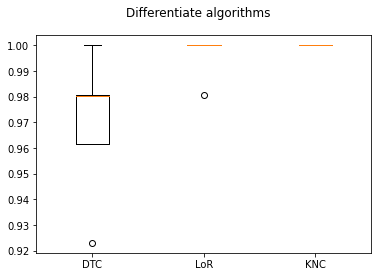

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))    
fig = plt.figure()    
fig.suptitle('Differentiate algorithms')    
ax = fig.add_subplot(111)    
plt.boxplot(results)    
ax.set_xticklabels(names)    
plt.show()

In [34]:
# KNeighborsClassifier appears a high score of accuracy
# Predict a value by validation using test set
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
KNC = KNeighborsClassifier()
KNC.fit(x_new_train, y1.values.ravel())    
predictions = KNC.predict(x_new_test)    
print(accuracy_score(y2, predictions))    
print(confusion_matrix(y2, predictions))    
print(classification_report(y2, predictions))   


0.9883720930232558
[[39  1  0]
 [ 0 18  0]
 [ 0  0 28]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00        28

    accuracy                           0.99        86
   macro avg       0.98      0.99      0.99        86
weighted avg       0.99      0.99      0.99        86



In [35]:
y2

,species
194,1
157,1
225,2
208,1
318,2
...,...
332,2
239,2
132,0
202,1


In [36]:
predictions

array([1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 2, 1,
       0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1])

## Testing the new data

In [37]:
species=["Adelie","Chinstrap","Gentoo"]

In [48]:
mean =np.array([[43.920930, 200.936047,4201.090116,17.143605,0.662791,1.508721]])
std =np.array([[5.450030, 14.042064, 802.213531, 1.978342, 0.726194, 0.506442]])
stxnew=np.array([[]])
i=0
X_new = np.array([[51.7, 213, 4550, 19 , 0, 2]])
for v in X_new:
    ct=(v-mean)/std
    stxnew=ct
    print(stxnew)
    if i==6:
        break

p=KNC.predict(stxnew)

[[ 1.42734444  0.85912961  0.43493393  0.93835899 -0.91269137  0.97005975]]


## Validating the prediction

In [49]:
print(species[int(p)])

Chinstrap
